<a href="https://colab.research.google.com/github/mpHarm88/DS-Unit-2-Applied-Modeling/blob/master/module2/Mikio_Harman_assignment_applied_modeling_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 2*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Classification problem: Are your classes imbalanced? Then, don't use just accuracy.
    - Regression problem: Is your target skewed? If so, let's discuss in Slack.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - _**[A Kaggle Master Explains Gradient Boosting](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/)**_
  - [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf) Chapter 8
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html)
  - _**[Boosting](https://www.youtube.com/watch?v=GM3CDQfQ4sw) (2.5 minute video)**_

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [0]:
df1 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df2 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv')
df3 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv')
df4 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv')
df5 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv')
df6 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv')
df7 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
df8 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df9 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv')
df10 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv')
df11 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv')
df12 = pd.read_csv('../data/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [0]:
all_df = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12] #combine together 
df_combined = pd.concat(all_df)
print('df_combined shape:',df_combined.shape)

df_combined = df_combined.fillna(0)              #fillling NaN
testing = df_combined[df_combined['year']==2017] #separating train/test
training = df_combined[df_combined['year']<2017]
print('The training shape before train/val split is:',training.shape)

train, val = train_test_split(training,          #split train/val
                              test_size=0.20,
                             random_state=42)
print('Train shape:',train.shape)
print('Val shape:',val.shape)
print('Test shape:',testing.shape)

target = 'CO'
X_train = train.drop(columns=target)
y_train = train[target]

X_val = val.drop(columns=target)
y_val = val[target]

X_test = testing.drop(columns=target)
y_test = testing[target]

X_train_CV = training.drop(columns=target)
y_train_CV = training[target]

df_combined shape: (420768, 18)
The training shape before train/val split is: (403776, 18)
Train shape: (323020, 18)
Val shape: (80756, 18)
Test shape: (16992, 18)


In [0]:
from sklearn.ensemble import RandomForestRegressor

pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators=100, n_jobs=-1)
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
pipe.score(X_val,y_val)

0.8952379532485081

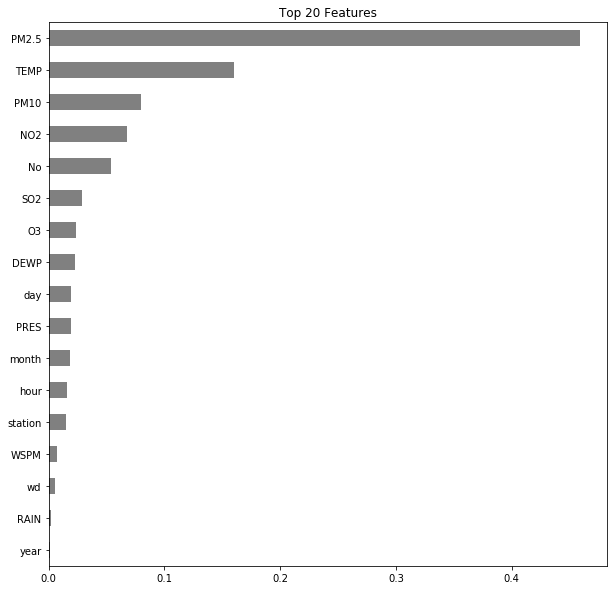

In [0]:
rf = pipe.named_steps['randomforestregressor']

importances = pd.Series(rf.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10, n/2))
plt.title('Top 20 Features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
# BEFORE: Sequence of the feature to be permuted
feature = 'PM2.5'

In [0]:
# BEFORE: Distribution of the feature to be permuted

In [0]:
# PERMUTE
X_val_permuted = X_val.copy()
X_val_permuted[feature] = np.random.permutation(X_val[feature])

In [0]:
#AFTER: Sequence has changed
X_val_permuted[feature].head()

27465     27.0
25917     12.0
18989    362.0
12019    254.0
27926     24.0
Name: PM2.5, dtype: float64

In [0]:
score_permuted = pipe.score(X_val_permuted, y_val)
print('Score ater permutation of PM2.5:',score_permuted)

Score ater permutation of PM2.5: 0.5181277936437765


In [0]:
#ELI5

transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median'),   
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.transform(X_val)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
    model, 
    scoring='r2',
    n_iter=2,
    random_state=42
)

permuter.fit(X_val_transformed, y_val);

In [0]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

PM2.5      0.373068
NO2        0.205379
TEMP       0.200611
PM10       0.148588
No         0.104653
SO2        0.090576
DEWP       0.064990
O3         0.044547
month      0.043832
PRES       0.036722
day        0.032523
hour       0.028875
station    0.024199
WSPM       0.002000
RAIN       0.001483
year       0.000911
wd         0.000679
dtype: float64

In [0]:
eli5.show_weights(
    permuter,
    top=None, 
    feature_names=feature_names
)

Weight,Feature
0.3731 ± 0.0071,PM2.5
0.2054 ± 0.0045,NO2
0.2006 ± 0.0084,TEMP
0.1486 ± 0.0007,PM10
0.1047 ± 0.0014,No
0.0906 ± 0.0005,SO2
0.0650 ± 0.0014,DEWP
0.0445 ± 0.0010,O3
0.0438 ± 0.0017,month
0.0367 ± 0.0020,PRES


In [0]:
min_importance = .001
mask = permuter.feature_importances_ > min_importance
features = X_train.columns[mask]
X_train = X_train[features]

In [0]:
X_val = X_val[features]

pipe = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(),
    RandomForestRegressor(n_estimators=100, n_jobs=-1)
)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)
pipe.score(X_val,y_val)

0.8961011955938712

In [0]:
#XG Boost

from xgboost import XGBRegressor
from xgboost import XGBClassifier

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

pipeline.fit(X_train, y_train)

[10:37:33] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['station'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'station',
                                          'data_type': dtype('O'),
                                          'mapping': Dongsi            1
Wanshouxigong     2
Huairou           3
Changping         4
Nongzhanguan      5
Dingling          6
Aotizhongxin      7
Gucheng           8
Shunyi            9
Tiantan          10
Guanyuan         11
Wanliu           12
NaN              -2
dtype: int64}],
                                return_df=T...
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
    

In [0]:
from sklearn.metrics import r2_score
y_pred= pipeline.predict(X_val)
r2_score(y_val, y_pred)

0.7824670565416156

In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

X_train.shape, X_val.shape, X_train_encoded.shape, X_val_encoded.shape

((323020, 15), (80756, 15), (323020, 15), (80756, 15))

In [0]:
eval_set = [(X_train_encoded, y_train),
           (X_val_encoded, y_val)]

model = XGBRegressor(
    n_estimators=100,
    max_depth=7,
    learning_rate=0.1,
    )

model.fit(X_train_encoded, y_train, eval_set=eval_set,
          #scoring by root mean squared error
          early_stopping_rounds=50) #stopping after 50 rounds of no improvement to val score



[10:51:10] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1471.62	validation_1-rmse:1475.85
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:1347.29	validation_1-rmse:1351.53
[2]	validation_0-rmse:1236.47	validation_1-rmse:1241.42
[3]	validation_0-rmse:1138.73	validation_1-rmse:1144.09
[4]	validation_0-rmse:1052.12	validation_1-rmse:1058.04
[5]	validation_0-rmse:975.581	validation_1-rmse:982.011
[6]	validation_0-rmse:908.057	validation_1-rmse:915.107
[7]	validation_0-rmse:849.358	validation_1-rmse:856.945
[8]	validation_0-rmse:797.862	validation_1-rmse:806.049
[9]	validation_0-rmse:752.887	validation_1-rmse:761.835
[10]	validation_0-rmse:713.889	validation_1-rmse:723.482
[11]	validation_0-rmse:679.475	validation_1-rmse:6

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
results = model.evals_result()

In [0]:
results['validation_0']

{'rmse': [1471.615112,
  1347.286255,
  1236.46582,
  1138.734985,
  1052.115601,
  975.581299,
  908.05719,
  849.357544,
  797.862366,
  752.886841,
  713.889221,
  679.475342,
  650.380981,
  625.572937,
  603.289978,
  584.721985,
  568.393494,
  554.208435,
  541.744324,
  531.025024,
  520.314148,
  512.038452,
  504.724121,
  497.423492,
  491.970673,
  485.658752,
  480.826996,
  476.916931,
  473.458588,
  469.695068,
  466.65564,
  463.350464,
  460.807281,
  458.27359,
  454.196625,
  451.586517,
  448.887695,
  446.518402,
  444.725494,
  442.657532,
  440.647522,
  438.94873,
  436.514038,
  434.965576,
  433.412415,
  432.267181,
  430.49408,
  428.458374,
  427.272888,
  426.166504,
  423.458466,
  421.633575,
  419.496216,
  418.55719,
  417.156097,
  415.979553,
  414.6008,
  413.931824,
  412.621094,
  411.097534,
  410.163696,
  409.179443,
  407.785858,
  405.73877,
  404.924774,
  403.854095,
  401.877289,
  401.327515,
  400.014099,
  399.090881,
  396.979523,
  3

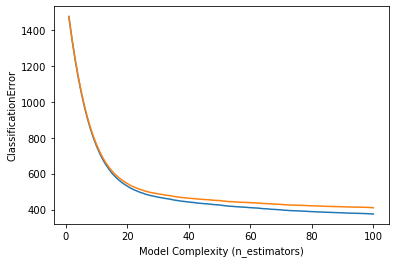

In [0]:
train_error = results['validation_0']['rmse']
val_error = results['validation_1']['rmse']
epoch = range(1, len(train_error)+1)

#Plotting the validation curve
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('ClassificationError')
plt.xlabel('Model Complexity (n_estimators)');

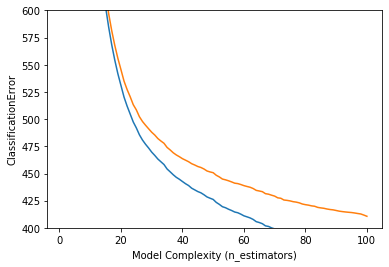

In [0]:
#Zooming in on validation curve
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('ClassificationError')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim(400,600);